<h1> Maximum de Vraisemblance, Régression Linéaire, Zones de Confiance et Traitement de Data Massives Collectées. </h1>

- Nom Complet: 
	- Ibrahim Lahlou
	- Fatima azzahra Ettarfi


Maximum de Vraisemblance, Régression Linéaire, Zones de Confiance et Traitement de Data Massives Collectées

<font color="purple">
    <h2 >Question 1 : Génération alétoires de données massives</h2>
</font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def box_muller(n):
    U1 = np.random.uniform(0, 1, n)
    U2 = np.random.uniform(0, 1, n)

    R = np.sqrt(-2 * np.log(np.where(U1 > 0, U1, 1e-10)))  # Replace 0 values with a small epsilon (1e-10)

    Theta = 2 * np.pi * U2
    Z = R * np.cos(Theta)

    return Z


L'algorithme de Box-Muller permet de générer des variables aléatoires normalement distribuées en utilisant les variables $U_1$ et $U_2$ comme suit :

\begin{align*}
R &= \sqrt{-2 \log(U_1)}, \\
\Theta &= 2\pi U_2, \\
Z &= R \cos(\Theta).
\end{align*}

La variable aléatoire $Z$ obtenue ainsi suit une distribution normale standard.


Sachant que $U_1, U_2, \ldots$ une séquence de variables aléatoires indépendantes et identiquement distribuées selon une loi normale standard.

<h5>  1.1 Génération des données </h5>

In [3]:
#n = int(input("Éntrer le nombre d’échantillons à tester = "))
#alpha = float(input("Éntrer la valeur de alpha paramètre (comprise entre 0 et 1) = ")) 
#var = float(input("Éntrer la valeur attribuée à la variance (entre 0 et 1) = "))
#X = box_muller(n)
#Y = alpha * box_muller(n) + np.sqrt(var) * np.random.randn(n)

<h5> 1.2 Les histogrammes des data massives générées correspondant aux nombres n = 20, 50, 300, 1000 et 7000 </h5>

In [4]:
def visualize_histograms(X,Y,n, alpha, var):
    X = box_muller(n)
    Y = alpha * box_muller(n) + np.sqrt(var) * np.random.randn(n)
    
    # Affichage de l'histogramme
    plt.hist(Y, bins='auto', alpha=alpha, color='blue')
    
    # Affichage du texte indiquant le nombre d'échantillons
    plt.text(0.5, -0.2, f"Histogrammes des données massives générées correspondant à n = {n}",
             horizontalalignment='center', transform=plt.gca().transAxes)
    
    # Ajout des points sous forme de cercles vides
    plt.scatter(X, Y, marker='o', facecolors='none', edgecolors='red')
  
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f"Histogrammes des données massives générées correspondant à n = {n}")
    
    plt.grid(True)
    plt.show()

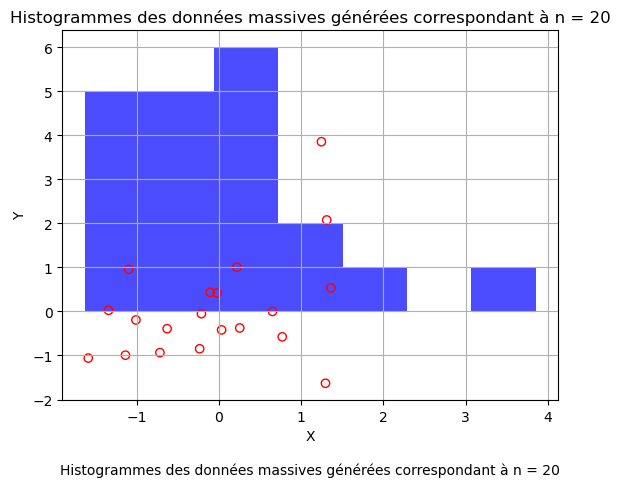

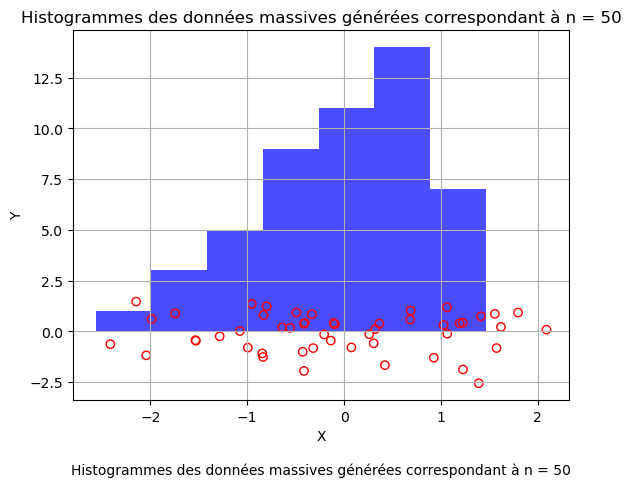

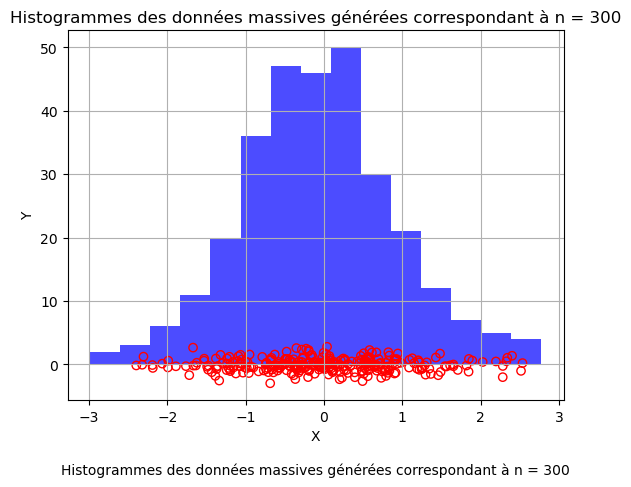

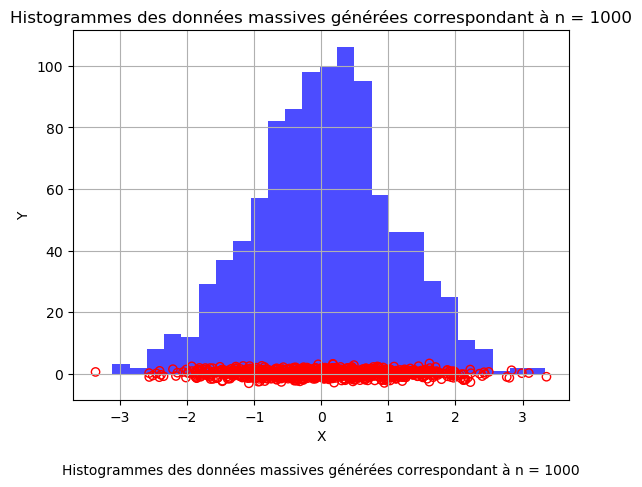

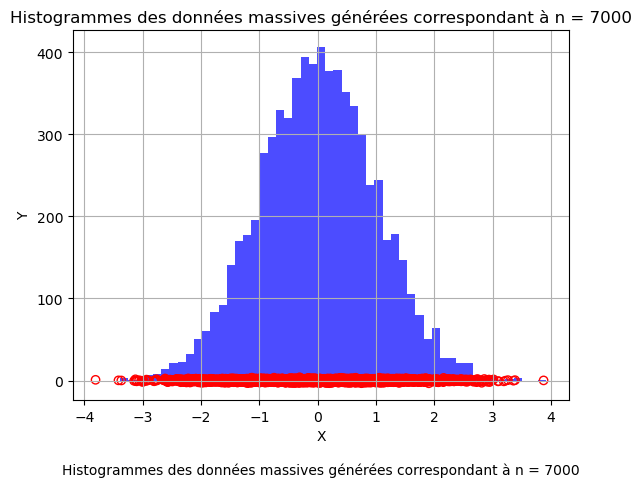

In [5]:
lst = [20,50,300,1000,7000]

alpha =0.7
var = 0.5

for n in lst:
    X = box_muller(n)
    Y = alpha * box_muller(n) + np.sqrt(var) * np.random.randn(n)
    visualize_histograms(X,Y,n, alpha, var)

<font color="green" ><h4>Intérprétation :</h4></font>

On Observe que plus on agglomére un grands nombre d'échantillons ensemble ,la distribution tend à ressembler à celle de la loi normal

<font color="green" ><h4>Demonstration Mathématique:</h4></font>

\begin{align*}
X_1, X_2, \ldots, X_n & \text{ i.i.d. avec moyenne } \mu \text{ et variance } \sigma^2.\\
S_n &= X_1 + X_2 + \ldots + X_n.\\
E[S_n] &= n\mu, \quad \text{Var}(S_n) = n\sigma^2.\\
\text{Selon le théorème central limite,} \\
\lim_{{n \to \infty}} \frac{{S_n - n\mu}}{{\sqrt{n\sigma^2}}} &\approx \text{Distribution normale}.
\end{align*}

<font color="green" ><h4>Conclusion :</h4></font>

Cela démontre que lorsque le nombre d'échantillons 

n devient très grand, la somme des échantillons $S_n$
  tend à se rapprocher d'une distribution normale avec une moyenne de $\mu$
nμ et une variance de 2nσ 

<font color="purple">
    <h2 >Question 2 : Comparaison des data générées avec la distribution Normale N(μ,σ).</h2>
</font>

In [9]:
mu = np.mean(Y) 
print("\nMean of Y: \n----------------------------------------\n", mu) 
sigma = np.std(Y) 
print("\nStandard deviation of Y:\n----------------------------------------\n", sigma) 
Point_G = [np.mean(X), np.mean(Y)] 
print("\nPoint G:\n----------------------------------------\n", Point_G)


Mean of Y: 
----------------------------------------
 0.005061771902240456

Standard deviation of Y:
----------------------------------------
 0.9859426709759228

Point G:
----------------------------------------
 [0.014148332068149042, 0.005061771902240456]


In [12]:
from scipy.stats import norm 
disty = norm.fit(Y) 
distx = norm.fit(X)


print("\nFitted Normal distribution for Y: \n----------------------------------------\n",disty) 

print("\nFitted Normal distribution for X:\n----------------------------------------\n", distx) 



Fitted Normal distribution for Y: 
----------------------------------------
 (0.005061771902240456, 0.9859426709759228)

Fitted Normal distribution for X:
----------------------------------------
 (0.014148332068149042, 1.0028662170614167)


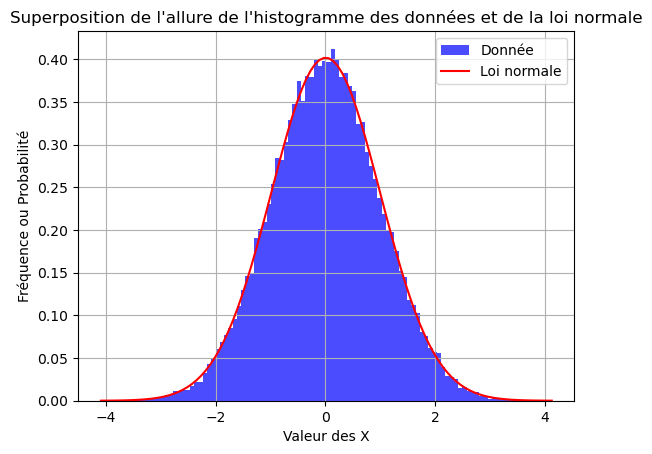

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_histograms(X):
    # Calcul de la moyenne et de l'écart-type des données générées
    mean = np.mean(X)
    std = np.std(X)

    # Affichage de l'histogramme des données
    plt.hist(X, bins='auto', color='blue', alpha=0.7, density=True , label = 'Donnée')

    # Création d'un intervalle de valeurs pour la courbe de la loi normale
    x = np.linspace(np.min(X), np.max(X), 100)

    # Calcul des valeurs de la loi normale correspondant à l'intervalle x
    y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)

    # Affichage de la courbe de la loi normale
    plt.plot(x, y, color='red', label='Loi normale')

    plt.xlabel('Valeur des X')
    plt.ylabel('Fréquence ou Probabilité')
    plt.title("Superposition de l'allure de l'histogramme des données et de la loi normale")
    plt.legend()
    plt.grid(True)
    plt.show()

# Générer les données avec la fonction box_muller
n = 40000
X = box_muller(n)

# Afficher la superposition de l'allure de l'histogramme et de la loi normale
visualize_histograms(X)


<font color="green" ><h4>Interprétation :</h4></font>

Les données massives générées suivent bien la distribution de la loi normale centrée réduite.